In [2]:
%pip install scipy
%pip install openpyxl
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit_posthocs
%pip install scipy
import Script as S
from functools import reduce
import pandas as pd
import os
import scipy 
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
directory = 'C:/Users/jamie/OneDrive - Imperial College London' #Set Main file directory
if (not os.path.exists(directory)):
    directory = 'c:/Users/jm3923/OneDrive - Imperial College London'

#Set label names
AB = 'Aβ'
CK = 'CK1δ'
hAPP = 'hAPPᵂᵀ'
NLGF = 'hAPPᴺᴸᴳf'

#Define hex colors to be used in project"    
colors = {'red':'#FF5757', 
          'dark_red':'#780000',
          'orange':'#ff8400',
            'blue':'#83FFFA',
            'dark_blue':'#03358c', 
            'green':'#8FFF83',
            'dark_green':'#176601',
            'yellow':'#FFFB83',
            'dark_yellow':'#8f8f01',
            'grey': '#808080',
            'black':'#000000'}

#Generate Blend Palettes based on all colors, access with "palettes['color-color']"
palettes = {} 
for key1,item1 in colors.items():
    for key2,item2 in colors.items():
        palettes[f'{key1}-{key2}'] = f'blend:{item1},{item2}'
#print(palettes)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import Experiment Data
def new_experiment(exp_dict):
    new_experiment = S.Experiment(exp_dict['name'], exp_dict['cellMarkers'], exp_dict['objectMarkers'], exp_dict['colocData'], exp_dict['otherStains'], exp_dict['stainColors'], exp_dict['behaviour'], exp_dict['otherAttributes'], exp_dict['labels'], directory+exp_dict['filePath'],)
    return new_experiment 

exp1_dict = {
    'name':'Experiment 1',
    'cellMarkers':['DAPI', 'mCherry'],
    'objectMarkers':['H31L21'],
    'colocData':{'H31L21':['mCherry']},
    'otherStains':[None],
    'stainColors':{'DAPI':'blue', 'mCherry':'red', 'H31L21':'green'},
    'behaviour':['Behaviour'], 
    'otherAttributes':['Area', 'Batch'],
    'labels': ['Labels'], 
    'filePath':'/Project/Data Analysis/newDISCO/H31L21'
}

exp2_dict = {
    'name':'Experiment 2',
    'cellMarkers':['DAPI', 'mCherry'],
    'objectMarkers':['MOAB-2', 'CK1δ'],
    'colocData':{'MOAB-2':['mCherry'], 'CK1δ':['mCherry']},
    'otherStains':[None],
    'stainColors':{'DAPI':'blue', 'mCherry':'red', 'MOAB-2':'green', 'CK1δ':'yellow'},
    'behaviour':[None], 
    'otherAttributes':['Area', 'Batch'],
    'labels': ['Labels'], 
    'filePath':'/Project/Data Analysis/newDISCO/MOAB-2.CK1'    
}

exp3_dict = {
    'name':'Experiment 3',
    'cellMarkers':['DAPI', 'mCherry'],
    'objectMarkers':['AT8'],
    'colocData':{'AT8':['mCherry']},
    'otherStains':['GFAP'],
    'stainColors':{'DAPI':'blue', 'mCherry':'red', 'AT8':'green', 'GFAP':'magenta'},
    'behaviour':[None], 
    'otherAttributes':['Batch'],
    'labels': ['Labels'], 
    'filePath':'/ImageJ/Experiments/p-Tau.GFAP/Data Analysis'   
}

exp4_dict = {
    'name':'Experiment 4',
    'cellMarkers':['Iba1'],
    'objectMarkers':['MOAB-2', 'H31L21', 'mCherry'],
    'colocData':{'MOAB-2':['mCherry', 'Iba1', 'H31L21'], 'H31L21':['mCherry', 'Iba1', 'MOAB-2'], 'mCherry':['Iba1', 'MOAB-2', 'H31L21']},
    'otherStains':[None],
    'stainColors':{'Iba1':'magenta', 'mCherry':'red', 'MOAB-2':'green', 'H31L21':'yellow'},
    'behaviour':['Behaviour'], 
    'otherAttributes':['Batch'],
    'labels': ['Labels'], 
    'filePath':'/ImageJ/Experiments/Exp4_Iba1/Data Analysis'  
}

exp1 = new_experiment(exp1_dict)
exp2 = new_experiment(exp2_dict)
exp3 = new_experiment(exp3_dict)
exp4 = new_experiment(exp4_dict)

exp1.process_data()
exp2.process_data()
exp3.process_data()
exp4.process_data()

[print(experiment) for experiment in [exp1, exp2, exp3, exp4])]

Beginning Data Processing for Experiment 1!
_______________________________________________
DAPI data imported
mCherry data imported
H31L21 data imported
Behaviour data imported
Area data imported
Batch data imported
Labels data imported
___________________________________________________
DAPI added to class 'cellMarker'
DAPI data cleaned
DAPI adjusted coordinates added
DAPI data processing successfully completed!
________________________________________
mCherry added to class 'cellMarker'
mCherry data cleaned
mCherry adjusted coordinates added
mCherry data processing successfully completed!
________________________________________
H31L21 added to class 'objectMarker'
H31L21 data cleaned
H31L21 adjusted coordinates added
H31L21 data processing successfully completed!
_____________________________________________________
Behaviour added to class 'Attribute'
Area added to class 'Attribute'
Batch added to class 'Attribute'
Labels added to class 'Attribute'
________________________________

In [9]:
#Combine Animal Summary from each experiment
from functools import reduce
import pandas as pd
def create_global_summary(experiments):
    summaries = [exp.Summary for exp in experiments]
    names = [exp.name for exp in experiments]
  
    global_summary = reduce(lambda left, right: pd.merge(left, right, on='Animal Name', how='outer', suffixes=('','_')), summaries)
    return global_summary

global_summary = create_global_summary([exp2, exp1, exp3, exp4])

global_summary

,Animal Name,DAPI IntDen,DAPI Mean IntDen,DAPI XM,DAPI YM,DAPI ZM,DAPI Raw XM,DAPI Raw YM,DAPI Count,mCherry IntDen,...,mCherry H31L21-Colocalised Count,mCherry H31L21-Non Colocalised Count,SCN_,SCN Volume_,Condition_,Period (h)_,Activity onset error,IV_,Arrhythmic,Batch_
0,NLGF11,68474.657350,63.437888,294.021347,232.718350,6.915120,333.707619,340.245727,966,9.422965e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NLGF12,76364.171750,68.087212,317.427453,247.932067,6.905201,380.444828,346.279609,1869,8.768495e+06,...,0.0,763.0,25.5,1.0,NLGF,23.45,5.38,0.306,0.0,1.0
2,NLGF13,66650.081917,59.663833,319.886510,264.407995,7.051755,384.452944,376.343634,1294,7.317065e+06,...,0.0,733.0,27.5,1.0,NLGF,23.60,5.09,1.377,0.0,1.0
3,NLGF15,53692.695652,53.609458,304.345978,230.292141,7.246667,365.837127,329.238739,1311,1.535947e+07,...,0.0,788.0,3.5,1.0,NLGF,23.95,2.54,0.744,0.0,2.0
4,NLGF16,66477.037924,68.079840,360.532421,262.312209,6.931799,418.121841,372.613358,1503,1.076406e+07,...,0.0,975.0,7.5,1.0,NLGF,23.16,5.92,1.053,1.0,2.0
5,NLGF21,66228.347072,62.172090,293.262750,240.377635,6.841244,366.388347,398.055014,1383,7.213031e+06,...,0.0,690.0,11.5,1.0,NLGF,23.95,2.53,0.439,0.0,2.0
6,NLGF22,67816.478046,58.053238,308.016488,258.720038,7.126729,369.834234,422.476274,1822,1.133112e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NLGF7,76303.231519,67.795288,301.496468,240.356067,7.245400,350.680902,331.803565,1231,8.220599e+06,...,0.0,988.0,21.5,1.0,NLGF,23.20,0.99,1.420,0.0,1.0
8,NLGF9,73366.941335,65.414700,302.823098,267.321429,7.147252,346.446129,364.259203,1483,7.150919e+06,...,0.0,774.0,23.5,1.0,NLGF,23.20,0.35,0.251,0.0,1.0
9,Syn1,66466.660900,62.044983,274.716250,236.988483,6.954315,269.215561,330.536566,1156,5.991287e+06,...,0.0,273.0,35.0,1.0,Syn,24.25,1.24,0.673,0.0,2.0


Syn
Syn14


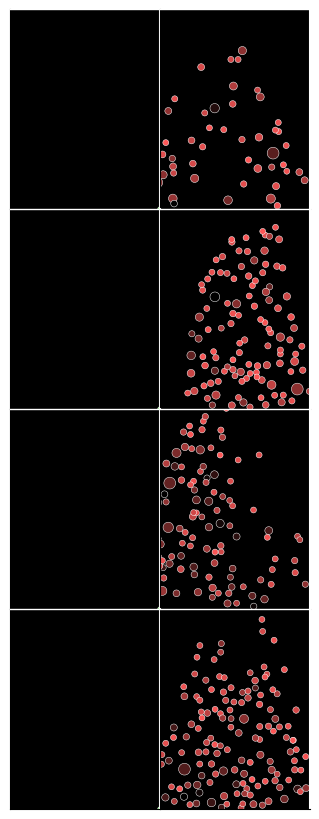

Syn15


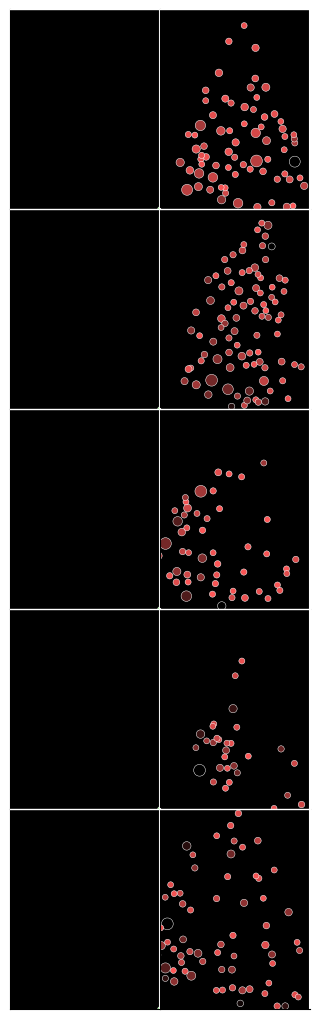

Syn16


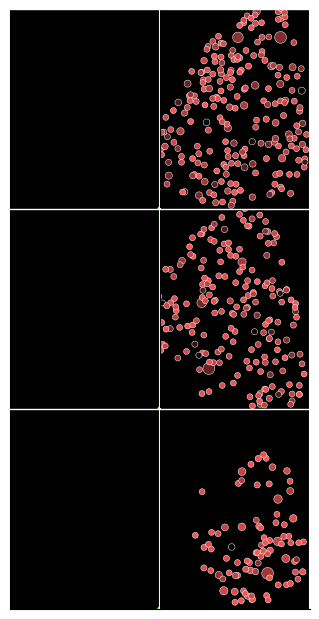

hAPP
hAPP2


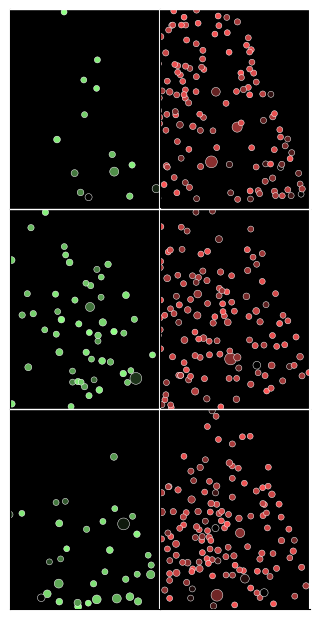

hAPP1


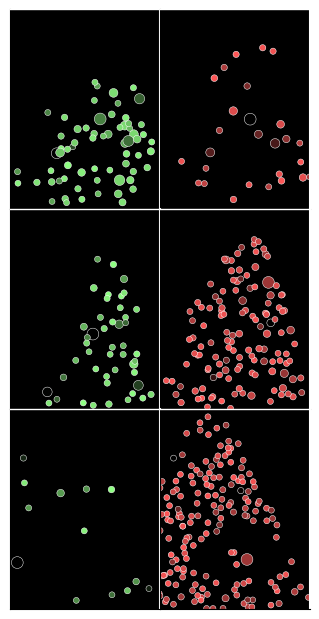

hAPP4


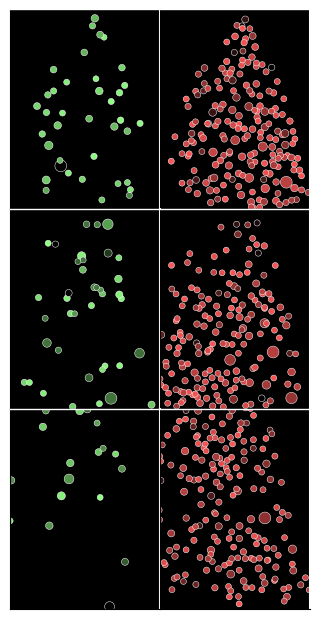

hAPP6


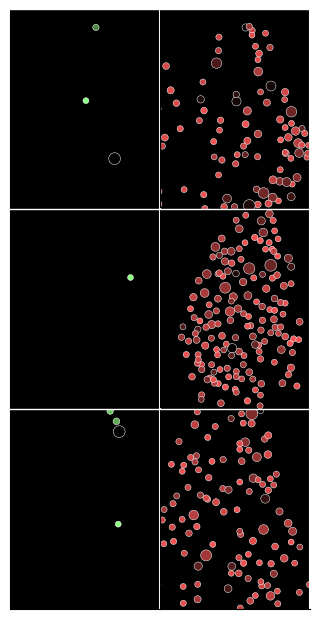

NLGF
NLGF7


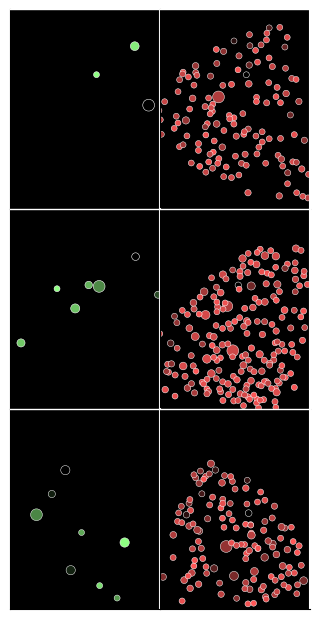

NLGF9


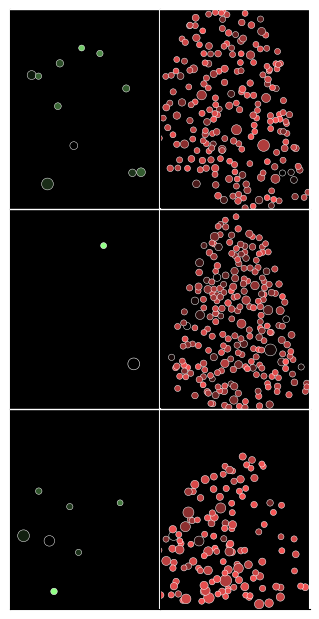

NLGF11


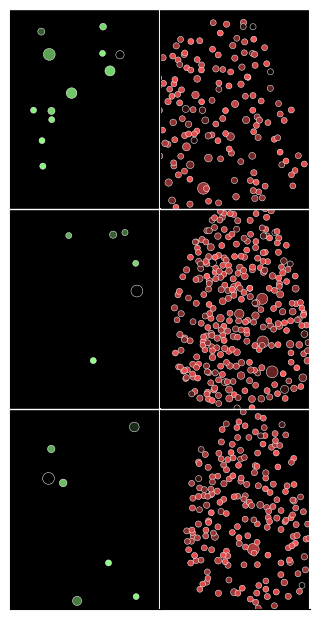

NLGF12


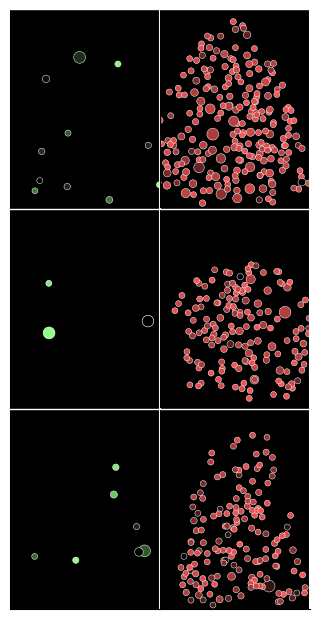

NLGF13


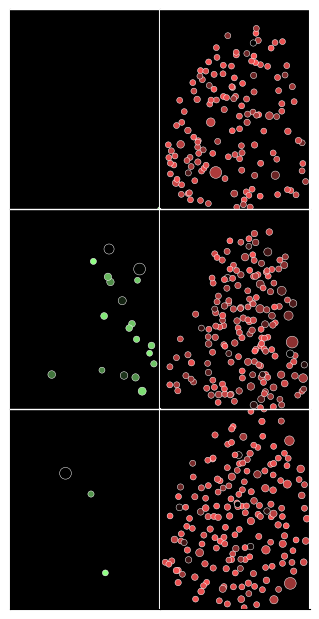

Syn
Syn14
Syn15
Syn16


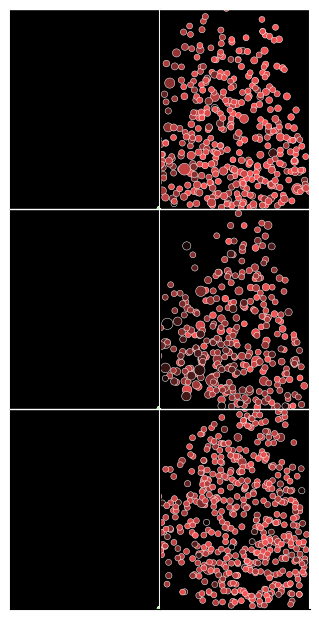

hAPP
hAPP2
hAPP1
hAPP4
hAPP6


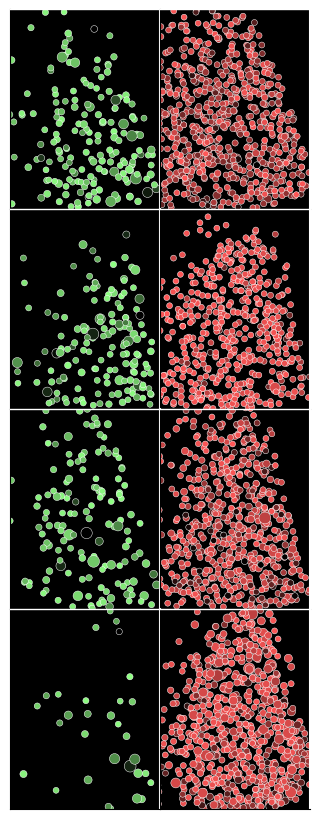

NLGF
NLGF7
NLGF9
NLGF11
NLGF12
NLGF13


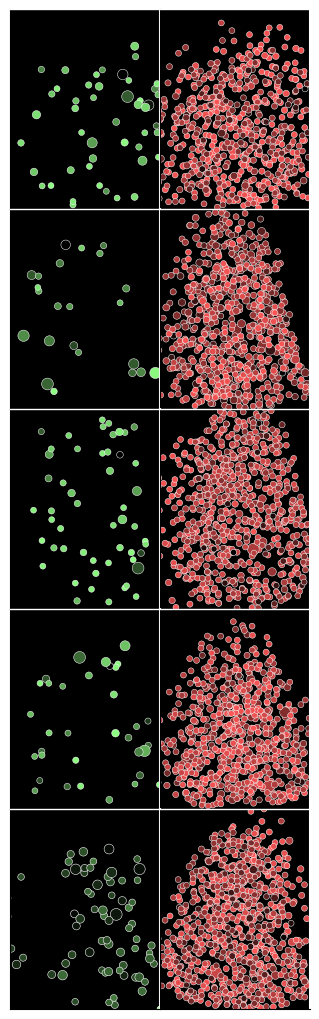

Syn
hAPP
NLGF


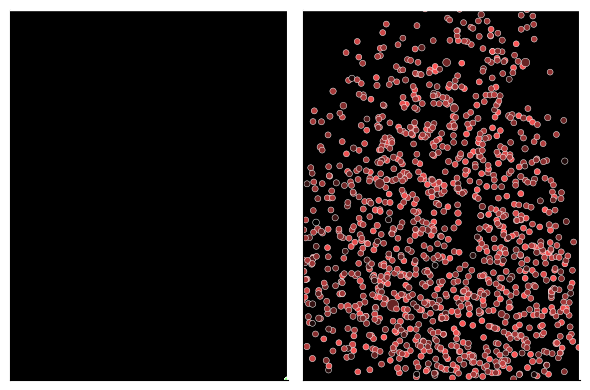

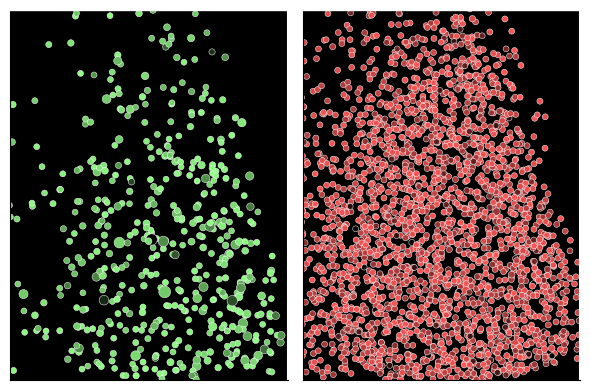

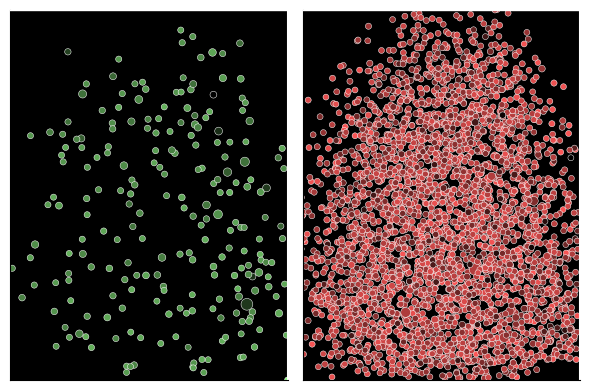

In [13]:
#Plot Locations
def plot_locations(experiment, stain_objects):
    S.iterate_condition(stain_objects=stain_objects, experiment=experiment, ifunction_c=S.iterate_animals, ifunction_a=S.iterate_SCN, afunction_s_list=[S.scatter], s_args={'local':1}, afunction_a_list=[S.create_subfigure], a_args={'length':'SCN_length'}, )
    S.iterate_condition(stain_objects=stain_objects, experiment=experiment, ifunction_c=S.iterate_animals, afunction_c_list=[S.create_subfigure], afunction_a_list=[S.scatter], c_args={'length':'animal_length'}, a_args={'local':1})
    S.iterate_condition(stain_objects=stain_objects, experiment=experiment, afunction_c_list=[S.create_subfigure, S.scatter], c_args={'length':1},)

plot_locations(exp1, ['H31L21', 'mCherry'])

In [23]:
import Script as S

In [24]:
#Plot mean bars

def plot_mean_bars(experiment):
    S.iterate_columns(experiment=experiment, afunction_col_list=[S.create_subplots, S.plot_bars_with_points], col_args={'length':1, 'width':1, 'size':(1.5,2.5)})

plot_mean_bars(exp2)

NameError: name 'directory' is not defined

Syn
hAPP
NLGF


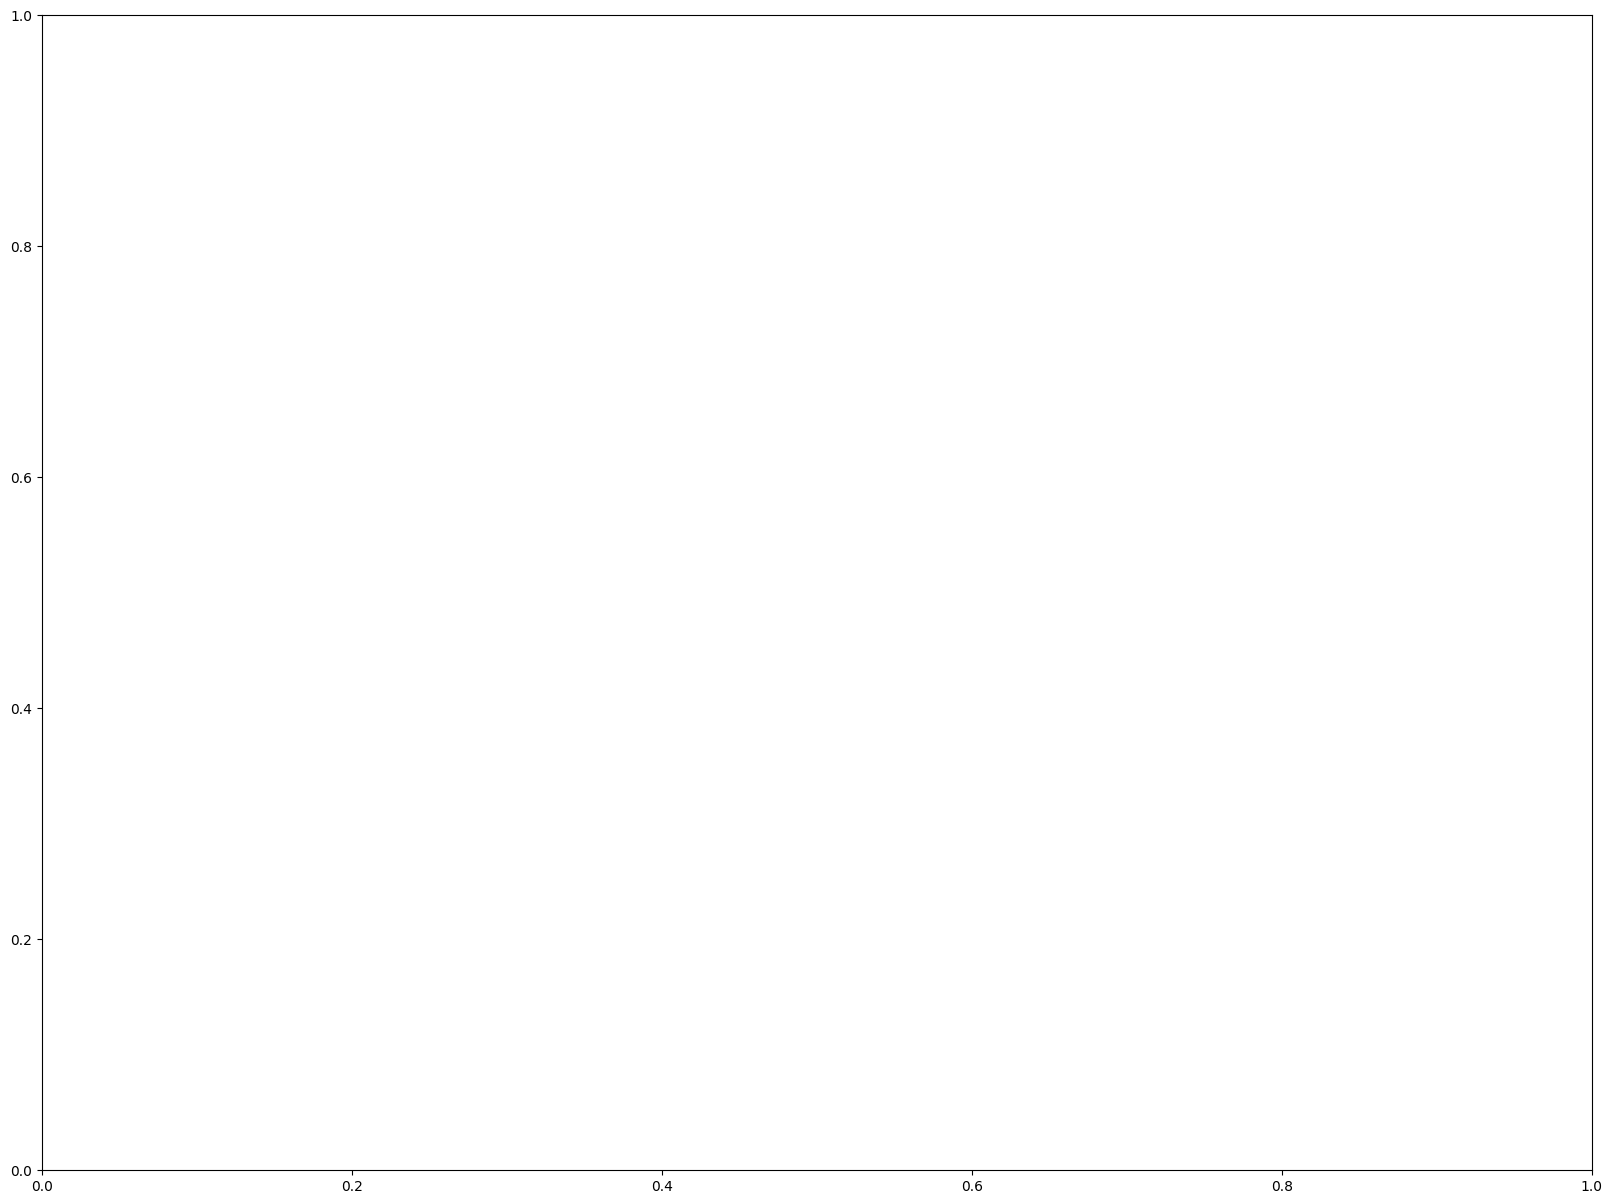

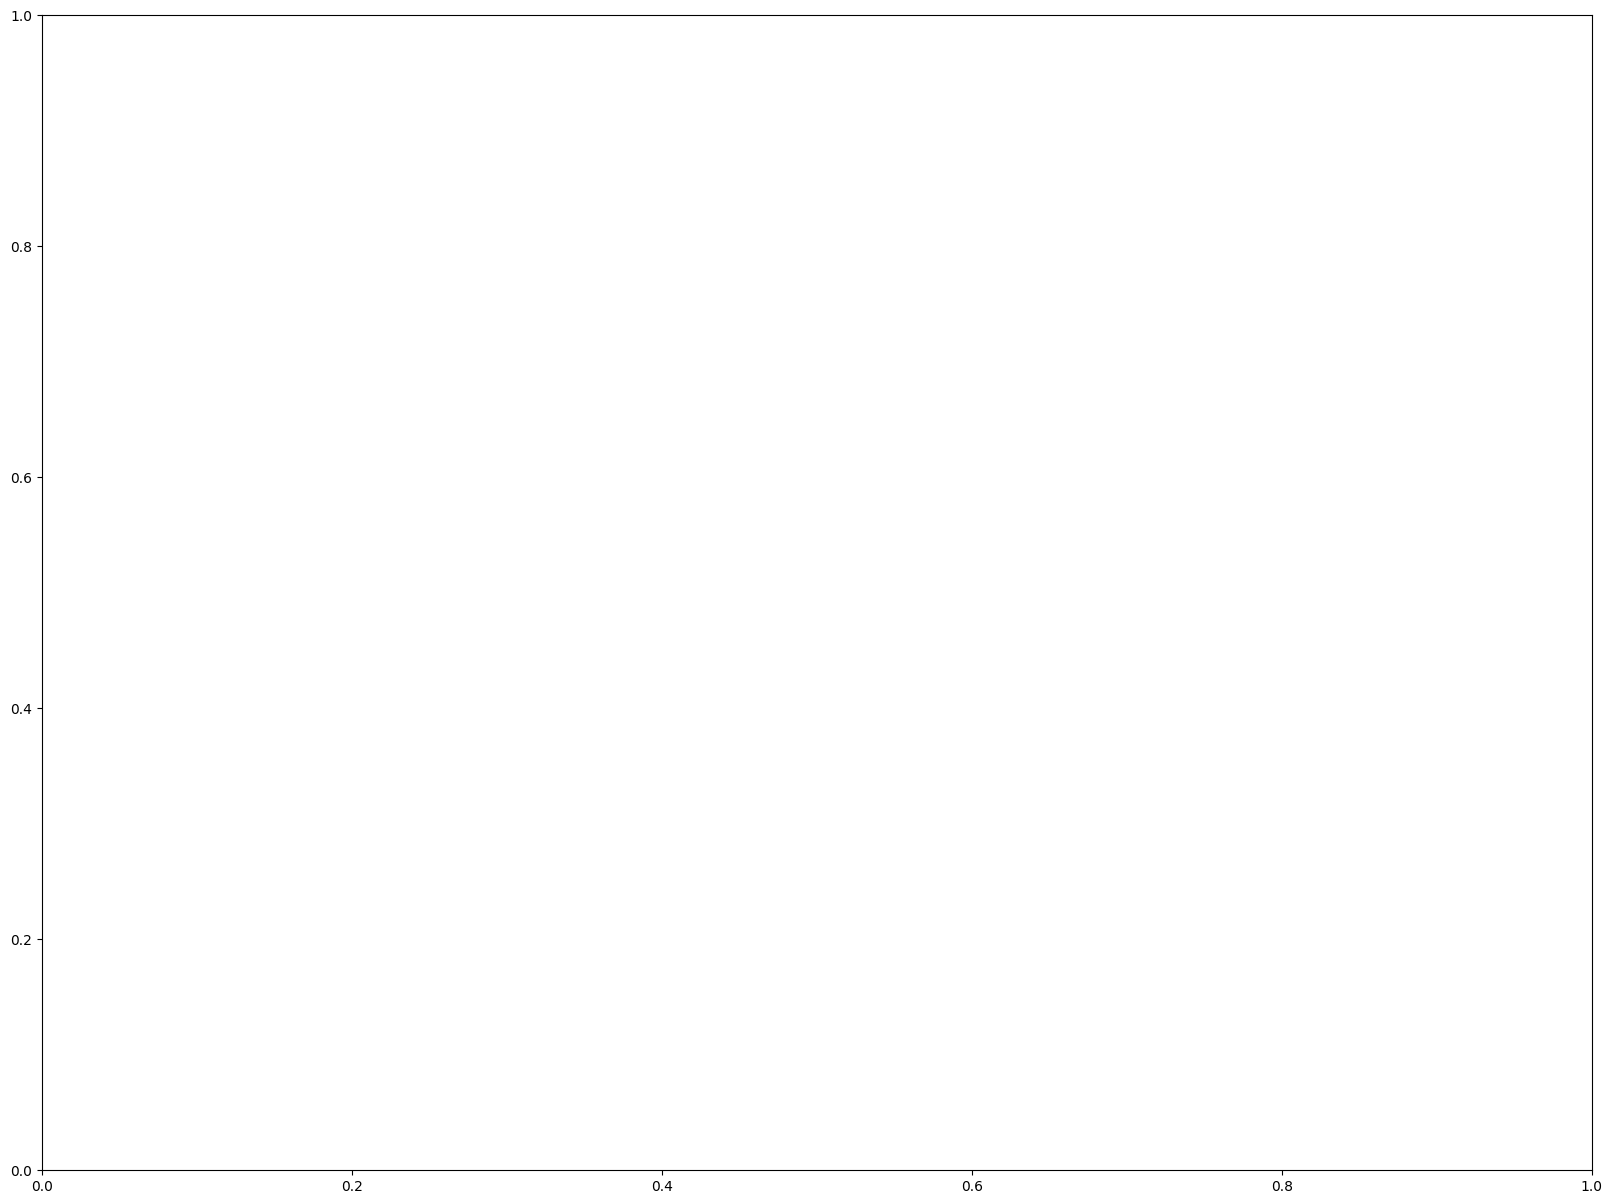

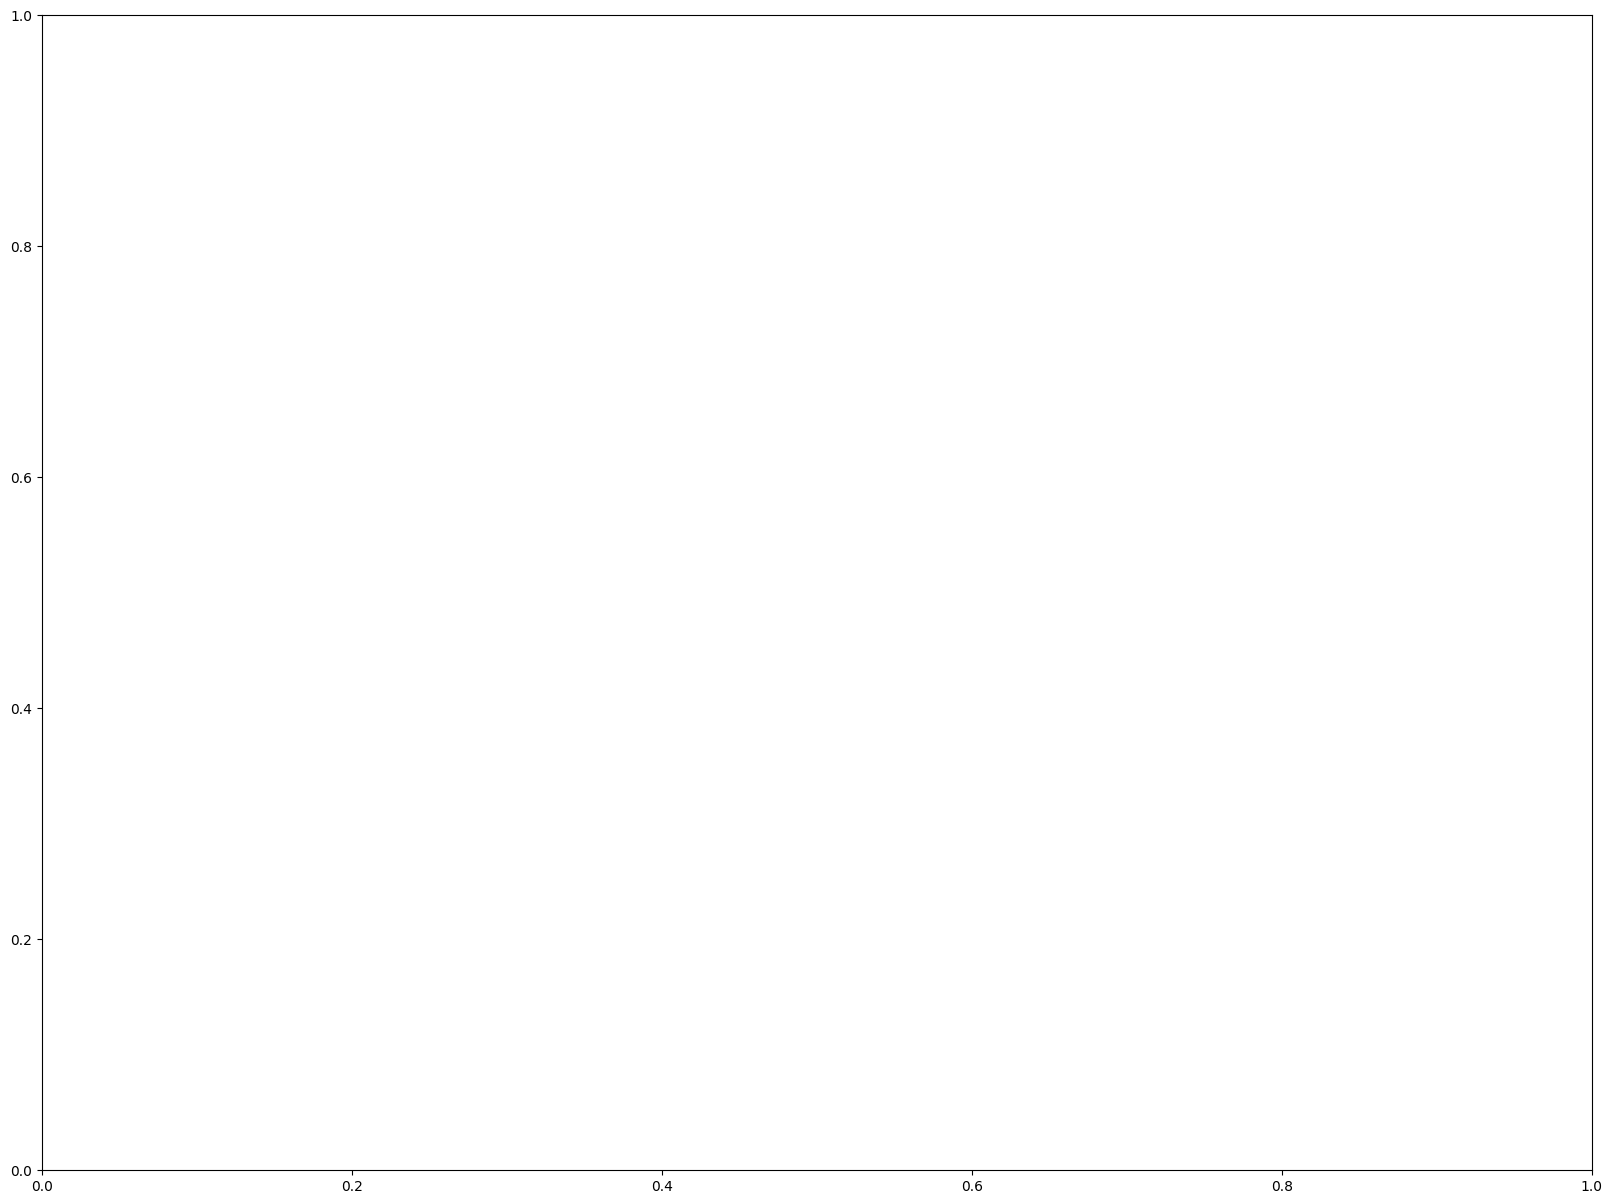

In [29]:
#Plot Matrices for a single experiment
def plot_matrices(exp):
    S.iterate_condition(experiment=exp, afunction_c_list=[S.create_subplots,S.matrices], c_args={'length':1, 'width':1, 'size':(20,15), 'columns':None})

plot_matrices(exp1)

ValueError: zero-size array to reduction operation fmin which has no identity

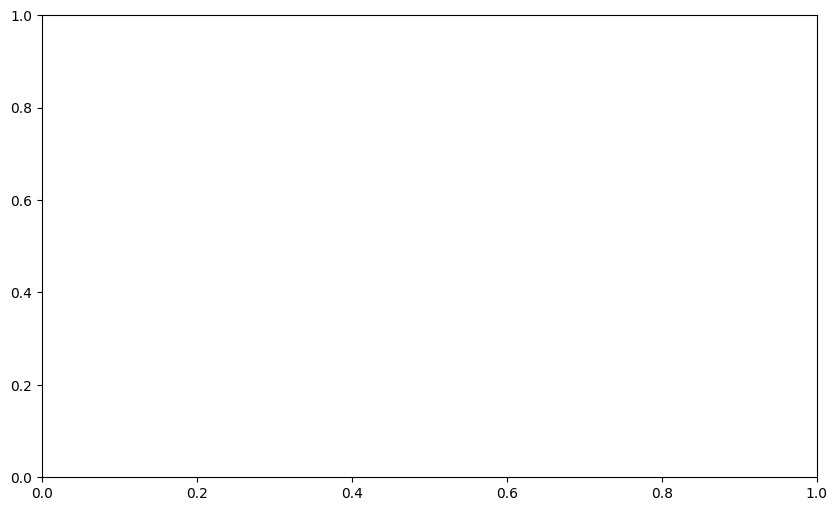

In [31]:
def plot_matrices_global(columns=None):
    from matplotlib import pyplot as plt
    import seaborn as sns
    import re
    summary_matrix = global_summary
    attribute_list = ['Syn', 'hAPP', 'NLGF']
    
    for i, attribute in enumerate(attribute_list):
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        summary_matrix = summary_matrix.filter(regex='^((?!M$).)*$')
        column_list = summary_matrix.select_dtypes(include=[int,float]).columns.tolist()
        isummary_matrix = summary_matrix[summary_matrix['Condition'] == attribute]
        column_list = columns
        try:
            isummary_matrix = isummary_matrix[column_list]
        except KeyError as k:
            error_msg = str(k)
            error_values_list = re.findall(r"'([^']*)'", error_msg)
            for error in error_values_list:
                column_list.remove(error)
            isummary_matrix = isummary_matrix[column_list]
            print(f'Columns: {error_values_list} removed as they were not in the dataframe') if i == len(attribute_list)-1 else None
        isummary_matrix = isummary_matrix.loc[:,~isummary_matrix.columns.duplicated()].copy()
        correlation_matrix = isummary_matrix.corr(method='spearman')
        sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax)
        ax.set_title(attribute_list[i], loc='Center')
        for v,column1 in enumerate(column_list):
            for j,column2 in enumerate(column_list):
                indexes_todrop = isummary_matrix[column1].isna() | isummary_matrix[column2].isna()
                column1_totest = isummary_matrix[~indexes_todrop][column1]
                column2_totest = isummary_matrix[~indexes_todrop][column2]
                result = stats.spearmanr(column1_totest, column2_totest)
                p = result.pvalue
                annotation = S.get_annotation(p, '')
                ax.text(v+0.55,j+0.55,annotation, ha='center', va='center', fontsize=10)
    plt.tight_layout()
    plt.show()

columns = []
plot_matrices_global(columns)

In [ ]:
#Plot colocalised and non-colocalised bars
#plot_colocalised_bars([List of stains], [List of colocalisers], Experiment, {Attribute: function})
#Attributes inlude Count, Volume, IntDen, Mean Intden
#Function include len (will give sum), np.mean, np.std
S.plot_colocalised_bars(['MOAB-2'], ['Iba1'], exp4, {'Count':len})
